

# Project: Investigate a Dataset - [TMDb movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time. 

what about using data analysis skills to know some intersting insights about movies, so let's start the analysis.


### Question(s) for Analysis
1. what is the Average runtime movies from year to year?
2. Are there a correlation between popularity and vote_aveage?
3. what are the top 10 movies in popularity?
4. How did the amount of produced films changed over time? 

In [2]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#changing numbers appearing format
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#calculating null values in each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

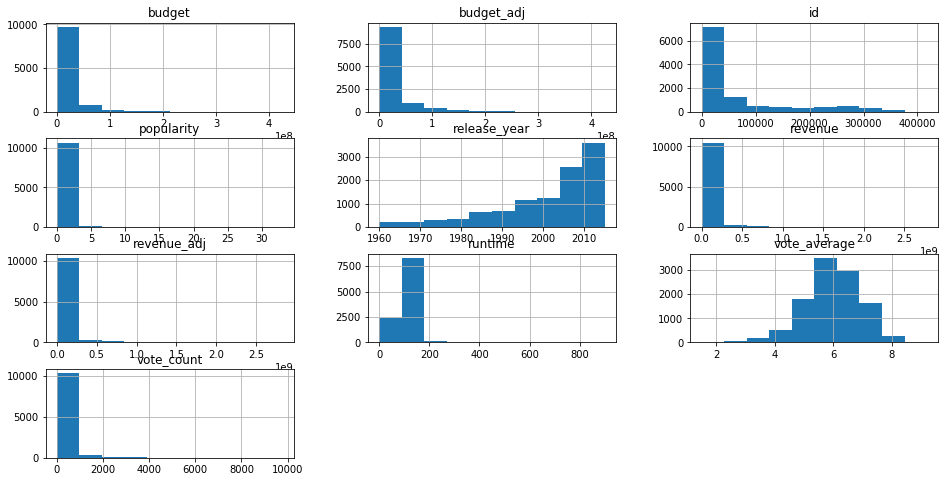

In [8]:
#take a general look at all columns of the data
df.hist(figsize=(16,8));





### Frist impression
there are rows contain several values, which are seperated by an "|",need to be cleaned . 
From the exploration above i found out that the data has null values in some columns and 0 values in others which kind a weird thing to have 0 values in such a column like how the run time for a movie equal zero or budget...etc,so we need to clean this up and drop unneeded columns.




### Data Cleaning
 

In [9]:

#replace 0 values with NAN
#sorce:https://stackoverflow.com/questions/49575897/cant-replace-0-to-nan-in-python-using-pandas
df['revenue'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [10]:
#Seperating columns that have several values
#source: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_keywords = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_prod = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_comp_{x+1}"))

df_cast.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [11]:
#Join the seperated columns and drop unneeded columns 

df = df.join([df_cast, df_director,df_genres,df_keywords, df_prod])
df = df.drop(['cast', 'director', 'keywords', 'production_companies', 'imdb_id', 'homepage', 'release_date', 'overview' , 'tagline'], axis=1)


In [12]:
#checking for duplicates
df.duplicated().sum()


0

In [13]:
#chicking the data type if it appropriate or not
df.dtypes

id                     int64
popularity           float64
budget               float64
revenue              float64
original_title        object
runtime              float64
genres                object
vote_count             int64
vote_average         float64
release_year           int64
budget_adj           float64
revenue_adj          float64
cast_1                object
cast_2                object
cast_3                object
cast_4                object
cast_5                object
director_1            object
director_2            object
director_3            object
director_4            object
director_5            object
director_6            object
genres_1              object
genres_2              object
genres_3              object
genres_4              object
genres_5              object
keywords_1            object
keywords_2            object
keywords_3            object
keywords_4            object
keywords_5            object
production_comp_1     object
production_com

In [14]:
df

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,...,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,production_comp_1,production_comp_2,production_comp_3,production_comp_4,production_comp_5
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,124.00,Action|Adventure|Science Fiction|Thriller,5562,6.50,2015,...,monster,dna,tyrannosaurus rex,velociraptor,island,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.42,150000000.00,378436354.00,Mad Max: Fury Road,120.00,Action|Adventure|Science Fiction|Thriller,6185,7.10,2015,...,future,chase,post-apocalyptic,dystopia,australia,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.11,110000000.00,295238201.00,Insurgent,119.00,Adventure|Science Fiction|Thriller,2480,6.30,2015,...,based on novel,revolution,dystopia,sequel,dystopic future,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,136.00,Action|Adventure|Science Fiction|Fantasy,5292,7.50,2015,...,android,spaceship,jedi,space opera,3d,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.34,190000000.00,1506249360.00,Furious 7,137.00,Action|Crime|Thriller,2947,7.30,2015,...,car race,speed,revenge,suspense,car,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
5,281957,9.11,135000000.00,532950503.00,The Revenant,156.00,Western|Drama|Adventure|Thriller,3929,7.20,2015,...,father-son relationship,rape,based on novel,mountains,winter,Regency Enterprises,Appian Way,CatchPlay,Anonymous Content,New Regency Pictures
6,87101,8.65,155000000.00,440603537.00,Terminator Genisys,125.00,Science Fiction|Action|Thriller|Adventure,2598,5.80,2015,...,saving the world,artificial intelligence,cyborg,killer robot,future,Paramount Pictures,Skydance Productions,None,None,None
7,286217,7.67,108000000.00,595380321.00,The Martian,141.00,Drama|Adventure|Science Fiction,4572,7.60,2015,...,based on novel,mars,nasa,isolation,botanist,Twentieth Century Fox Film Corporation,Scott Free Productions,Mid Atlantic Films,International Traders,TSG Entertainment
8,211672,7.40,74000000.00,1156730962.00,Minions,91.00,Family|Animation|Adventure|Comedy,2893,6.50,2015,...,assistant,aftercreditsstinger,duringcreditsstinger,evil mastermind,minions,Universal Pictures,Illumination Entertainment,None,None,None
9,150540,6.33,175000000.00,853708609.00,Inside Out,94.00,Comedy|Animation|Family,3935,8.00,2015,...,dream,cartoon,imaginary friend,animation,kid,Walt Disney Pictures,Pixar Animation Studios,Walt Disney Studios Motion Pictures,None,None


the data looks prepared for the analysis, no duplicates have been found, no nanull values, columns containing multiple values have been seperated and data types look ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Average runtime movies from year to year?)

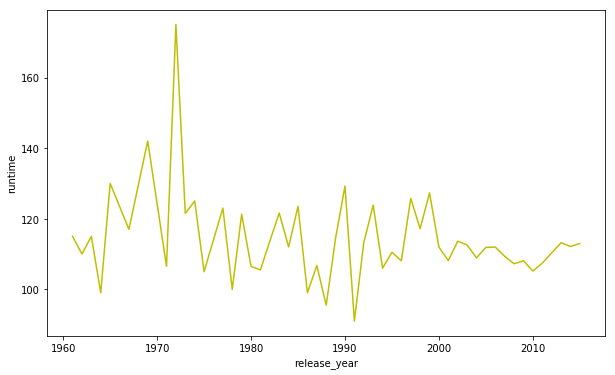

In [15]:
#creating a plot of the mean of rlease year vs runtime
df.groupby('release_year').mean()['runtime'].plot(figsize=(10,6),color='y');
plt.xlabel('release_year')
plt.ylabel('runtime');
min_av=df.groupby('release_year').mean()['runtime'].min()
max_av=df.groupby('release_year').mean()['runtime'].max()

the chart indicate that the average runtime movies is about 130.00 m ,the minimum Average runtime movies is 91.0,but maximum is 175.0.

In [16]:
#calcuating the min and max run time
min_av=df.groupby('release_year').mean()['runtime'].min()
max_av=df.groupby('release_year').mean()['runtime'].max()
min_av,max_av


(91.0, 175.0)

### Research Question 2 (Are there a correlation between popularity and vote_aveage?)

In [17]:
pop_vote=df[['popularity','vote_average']]
pop_vote.corr()

,popularity,vote_average
popularity,1.00,0.36
vote_average,0.36,1.00


### Research Question 3 (what are the top 10 movies in popularity?)

In [24]:
index = pd.Index(range(1, 11, 1))#setting index of movies order in the list
top_df=df[['original_title','popularity','genres','release_year']]
top_ten=top_df.nlargest(n=10,columns=['popularity']).set_index(index)
top_ten

,original_title,popularity,genres,release_year
1,Jurassic World,32.99,Action|Adventure|Science Fiction|Thriller,2015
2,Mad Max: Fury Road,28.42,Action|Adventure|Science Fiction|Thriller,2015
3,Interstellar,24.95,Adventure|Drama|Science Fiction,2014
4,Guardians of the Galaxy,14.31,Action|Science Fiction|Adventure,2014
5,Insurgent,13.11,Adventure|Science Fiction|Thriller,2015
6,Captain America: The Winter Soldier,12.97,Action|Adventure|Science Fiction,2014
7,Star Wars,12.04,Adventure|Action|Science Fiction,1977
8,John Wick,11.42,Action|Thriller,2014
9,Star Wars: The Force Awakens,11.17,Action|Adventure|Science Fiction|Fantasy,2015
10,The Hunger Games: Mockingjay - Part 1,10.74,Science Fiction|Adventure|Thriller,2014


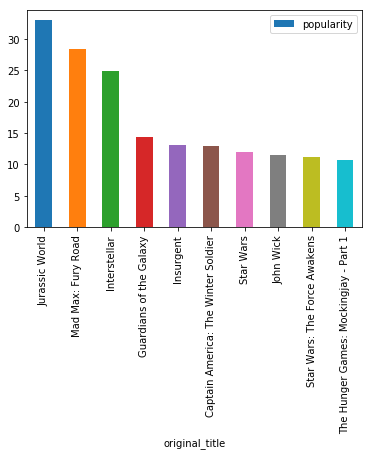

In [23]:
#creating a bar plot for top movies popularity
top_ten.plot(x='original_title',y='popularity',kind='bar')

nice! this bar chart indicates the top 10 movies in popularity, Jurassic World in the lead...

### Research Question 4 (How did the amount of produced films changed over time?)

In [25]:
#calculating the number of movies in last 10 years
movie_year=df.groupby('release_year').count()['id']
movie_year.tail(10)


release_year
2006     68
2007     92
2008     82
2009    116
2010    132
2011    156
2012     88
2013     65
2014     70
2015     93
Name: id, dtype: int64

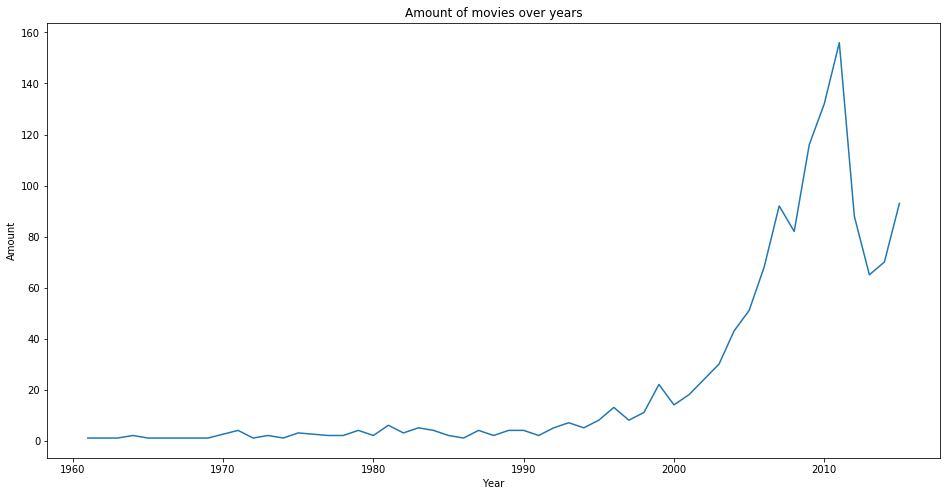

In [26]:
#creating a line chart shows the amonut of movies per year
movie_year.plot(figsize=(16,8),title='Amount of movies over years')
plt.xlabel('Year')
plt.ylabel('Amount');


form the plot we can see that the amount of movies has increased significantly from 1998 to 2015 and reached its peak in 2011. 

<a id='conclusions'></a>
## Conclusions
**Results:**
 
The first research question "What is the Average runtime movies from year to year?" indicate that the average runtime movies is about 130.00 m ,the minimum and maximum Average runtime movies are respectively(91.0, 175.0).

The second research question "Are there a correlation between popularity and vote_aveage?" indicate that there is no strong corralation between them.

The third research question "What are the top 10 movies in popularity?" indicate that jurassic world is the most popular produced movie followed by Mad Max: Fury Road and Interstellar, movies genres concentarted in Action|Adventure|Science Fiction|Thriller, notcing that most of them produced lately. 

 The forth research question "How did the amount of produced films changed over time?"  reveals that the amount of produced films significantly increased from 1998 to 2015, and reached its peak in 2011, this can be an idicator for the huge developement in cinema in the last decade and we expect it to increase more and more now respectively with the increase in audience,and movies platforms now adays. </pre>

**limitations:**
*  Most of our varialbes are categorical, which does not allow for a high level of statistical method that can be used to provide correlatios etc.
* data outcomes cann't be generalised because some entries in the dataset have been removed due to missing data ,but can be treated as indicators.
* considering that many inputs in our data have been removed due to missing data.
* we can add more recent data to this data to have better insights

In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0